In [0]:
import numpy as np
import cv2
from google.colab import drive
drive.mount('/content/gdrive')

def read_dataset(datset_dir_name="dataset"):

   
    index=0
    dataset=np.zeros(shape=(400,10304),dtype="uint8")
    labels=np.zeros(shape=400)

    for i in range(1,41):        
      for image_name in range(1,11):
          img = cv2.imread("/content/gdrive/My Drive/dataset/dataset/" + "s"+str(i)+"/" +str(image_name) +".pgm", 0)
          img=np.reshape(img,newshape=(92*112))
          dataset[index]=img
          labels[index]=i
          index=index+1

    return dataset,labels
  
def split_the_dataset(dataset,labels):
 
    
    train_set=np.zeros(shape=(200,10304),dtype="uint8")
    test_set=np.zeros(shape=(200,10304),dtype="uint8")
    train_labels=np.zeros(shape=(200),dtype="uint8")
    test_labels=np.zeros(shape=(200),dtype="uint8")
    train_set_index=0
    test_set_index=0
    for i in range(0,400):
        if i%2==0:
            train_set[train_set_index]=dataset[i]
            train_labels[train_set_index]=labels[i]
            train_set_index+=1

        else:
            test_set[test_set_index]=dataset[i]
            test_labels[test_set_index]=labels[i]
            test_set_index+=1
    
    return train_set,test_set,train_labels,test_labels


def PCA(D, alpha,test):
    meanVec = np.mean(D,axis=0)
    print(meanVec)
    #dimension = len(D[0])
    z = D - meanVec
    
    # print(z)

    print(z.shape)
    cov=np.dot(z.transpose(),z)
    cov/=len(z)
    print("covariance matrix")
    print(cov.shape)
    print(cov)
    
    print("working on eigenvactors")
    eigen_values, eigen_vectors = np.linalg.eigh(cov)
    # calculating variance
    sumOfLamdas = sum(eigen_values)

    arr1inds = eigen_values.argsort()
    eigen_values = eigen_values[arr1inds[::-1]]
    eigen_vectors = eigen_vectors[arr1inds[::-1]]
    print(eigen_values)
    print(sumOfLamdas)
    dimension = len(eigen_values)
    # print(dimension)
    r = 1
    # According to the smallest r ,We find the the largest lamdas that are exceeding our alpha threshold
    # while r in range(dimension,-1):
    summation = 0
    i=0
    while i <len(z):
        # print(i)
        r = i+1
        summation += eigen_values[i]

        f=summation/sumOfLamdas
        if (f >= alpha):

            break
        i+=1
 

    # We have the smallest r which is the number of the eigen values and satisfy ( f(r) >= alpha )
    # print("rrr"+str(r))
    newReducedEigenVectors = eigen_vectors[:,:r]   # eigen_Vectors[0:r-1][:]
    print("z shape"+str(z.shape))
    print("new eigen vectors "+str(newReducedEigenVectors.shape))

    reduced_data=np.transpose(np.transpose(newReducedEigenVectors).dot(np.transpose(D)))
#     reduced_test=np.dot(D,newReducedEigenVectors)
    reduced_test=np.transpose(np.transpose(newReducedEigenVectors).dot(np.transpose(test)))

#     reduced_test=np.dot(test,newReducedEigenVectors)

    return reduced_data,reduced_test
def split_the_dataset_for_bonus(dataset,labels):
    train_set = np.zeros(shape=(280,10304),dtype="uint8")
    test_set = np.zeros(shape=(120,10304),dtype="uint8")
    train_labels = np.zeros(shape=(280),dtype="uint8")
    test_labels = np.zeros(shape=(120),dtype="uint8")
    train_set_index = 0
    test_set_index = 0
    goToTrain = True
    trainLimit = 0
    testLimit = 0

    for i in range(0, 400):
        print(labels[i])
        if goToTrain == True:
            # print(i)
            trainLimit += 1
            train_set[train_set_index] = dataset[i]
            train_labels[train_set_index] = labels[i]
            train_set_index += 1

        else:
            # print("in Test with i = ", i)
            testLimit += 1
            test_set[test_set_index] = dataset[i]
            test_labels[test_set_index] = labels[i]
            test_set_index += 1

        if ( goToTrain == True and trainLimit == 7 ):
            goToTrain = False
            testLimit = 0
        if ( goToTrain == False and testLimit == 3):
            trainLimit = 0
            goToTrain = True
    return train_set, test_set, train_labels, test_labels

def LDA(x, y, x2):
    # x is the data , y is labels
    # 1 Calculating the mean vector for each class of the 40 classes
    mean_vectors = []
    for cl in range(1, 41):
        mean_vectors.append(np.mean(x[y == cl], axis=0))
        print('Mean Vector class %s: %s %s\n' % (cl, mean_vectors[cl - 1], np.shape(mean_vectors)))

    # 2 Between-class scatter matrix SB
    Sb = np.zeros((10304, 10304))
    overall_mean = np.mean(x, axis=0)
    print("Overall Mean", overall_mean, np.shape(overall_mean))
    # mean_vec shape > 1*10304   & mean_vectors > 400*10304
    for m, mean_vec in enumerate(mean_vectors):
        # m is the class number( label ) starts from 0 so we use m+1 to match labels
        n = x[y == m + 1, :].shape[0]  # number of samples in k-th class
        #print("N: ", n)
        #print(n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T))
        mean_vec = mean_vec.reshape(10304, 1)  # make column vector
        overall_mean = overall_mean.reshape(10304, 1)  # make column vector
        Sb += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        #print("Sb: ", Sb)
        # np.matrix(Sb)
    print('between-class SHAPE:\n', np.shape(Sb))
    # print('between-class Scatter Matrix:\n', Sb)

    # 3 Within-class scatter matrix S

    S = np.zeros((10304, 10304))
    for cl, mv in zip(range(1, 41), mean_vectors):
        Si = np.zeros((10304, 10304))   # scatter matrix for every class
        for row in x[y == cl]:
            # row, mv = row.reshape(10304, 1), mv.reshape(10304, 1)  # make column vectors
            row, mv = row.reshape(10304, 1), mv.reshape(10304, 1)
            Zi = row - mv
            Si += Zi.dot(Zi.T)
        S += Si  # sum class scatter matrices
    '''
    S = np.zeros(shape=(np.shape(x)[1], np.shape(x)[1]))
    # print(S.shape[1])
    for i in range(0, 40):
        z = np.array(clusters[i], dtype='float32')
        print("zzzzzzzzzzzzz", clusters[i].shape)
        z = np.array(clusters[i] - mean_vectors[i])

        S += np.dot(np.transpose(z), z)
    '''
    print('within-class Scatter Matrix:\n', S)


    # 4 eigens
    s_inverse = np.linalg.inv(S)
    print("Done with inverse(S),Working on eigens...")
    eig_vals, eig_vecs = np.linalg.eigh(s_inverse.dot(Sb))

    # Sorting the eigen values & vector in descending order
    # Make a list of (eigenvalue, eigenvector) tuples
    print("Sorting eigens...")
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)

    # Visually confirm that the list is correctly sorted by decreasing eigenvalues
    '''
    print('Eigenvalues in decreasing order:\n')
    for i in eig_pairs:
        print(i[0])
    '''
    print("Projecting the data...")
    numofVectors = 39
    dominantEigenVectors=[0]*numofVectors
    for i in range(0, numofVectors):
        dominantEigenVectors[i] = (eig_pairs[i][1])
        print("Dominant EigenVector: ", dominantEigenVectors[i])
        print("SHAPE OF EigenVector: ", np.shape(dominantEigenVectors[i]))
    print("Shape of U: ", np.shape(dominantEigenVectors))
    # Project the training set and test sets separately using same projection
    # matrix U (dominantEigenVectors)with shape of (39x10304)
    # our data is (200x10304)
    # We find X` = X x W
    newTrainingData = np.matrix(x).dot(np.transpose(dominantEigenVectors))
    newTestData = np.matrix(x2).dot(np.transpose(dominantEigenVectors))

    return newTrainingData, newTestData
def Tunning_classifier_PCA_Alpha(train_set, test_set, train_labels, test_labels):
  print("Tunning classifier PCA ALPHA")
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.metrics import classification_report, confusion_matrix
  accuracy_set=[]
  alpha_set=[0.8,0.85,0.9,0.95]
  for i in range(len(alpha_set)):
    print("for alpha = ",alpha_set[i] )
    reducedTrainingData, reducedTestData= PCA(train_set, alpha_set[i],test_set)
    print(np.shape(reducedTrainingData))
    #print(reducedTrainingData)

    print(np.shape(reducedTestData))
    print(reducedTestData)
    print("Done PCA")


      #Classification using KNN
    classifier = KNeighborsClassifier(n_neighbors=1)
    classifier.fit(reducedTrainingData, train_labels)

    y_pred = classifier.predict(reducedTestData)
    print(y_pred)
    print("Shapre of Pred: ", np.shape(y_pred))
    print(confusion_matrix(test_labels, y_pred))
    print(classification_report(test_labels, y_pred))

    from sklearn.metrics import accuracy_score
    score=accuracy_score(test_labels, y_pred)
    print("Accuracy: ",score )
    accuracy_set.append(score)    

    
  
  return alpha_set,accuracy_set
  
  


    
def Tunning_classifier_k(train_set, test_set, train_labels, test_labels):
  reducedTrainingDataPCA, reducedTestDataPCA= PCA(train_set, .95,test_set)
  print("Done PCA")

  reducedTrainingDataLDA, reducedTestDataLDA= LDA(train_set,train_labels,test_set)
  print("Done LDA")


      
  from sklearn.neighbors import KNeighborsClassifier
  k=[1,3,5,7]
  accuracy_set_PCA=[]
  accuracy_set_LDA=[]
  for i in  range(len(k)):
    print("for k = ",k[i])
    classifier = KNeighborsClassifier(n_neighbors=k[i])
    classifier.fit(reducedTrainingDataPCA, train_labels)
       

    y_pred_PCA = classifier.predict(reducedTestDataPCA)
    print("PCA classifier")
    from sklearn.metrics import classification_report, confusion_matrix
    print(y_pred_PCA)
    print("Shapre of Pred: ", np.shape(y_pred_PCA))
    print(confusion_matrix(test_labels, y_pred_PCA))
    print(classification_report(test_labels, y_pred_PCA))
    from sklearn.metrics import accuracy_score
    score=accuracy_score(test_labels, y_pred_PCA)
    print("Accuracy: ",score )
    
    accuracy_set_PCA.append(score) 
    
    
    
    classifier.fit(reducedTrainingDataLDA, train_labels)
    print("LDA classifier")

    y_pred_LDA = classifier.predict(reducedTestDataLDA)
    from sklearn.metrics import classification_report, confusion_matrix
    print(y_pred_LDA)
    print("Shapre of Pred: ", np.shape(y_pred_LDA))
    print(confusion_matrix(test_labels, y_pred_LDA))
    print(classification_report(test_labels, y_pred_LDA))
    from sklearn.metrics import accuracy_score
    score=accuracy_score(test_labels, y_pred_LDA)
    print("Accuracy: ",score )
    accuracy_set_LDA.append(score) 
    
    print()
    

  return k,accuracy_set_PCA,accuracy_set_LDA     

def main():
    dataset,labels=read_dataset()
    train_set, test_set, train_labels, test_labels=split_the_dataset(dataset=dataset,labels=labels)
    print(np.shape(train_labels))
    '''
    first=test_set[0]
    first=np.reshape(first,newshape=(112,92))
    print(type(first[0,0]))
    print("Working")
    cv2.imshow("image", first)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
    #data = np.matrix([ [1, 2, 3, 0, 1], [4, 5, 6, 0, 7], [7, 8, 9, 0, 2], [2, 4, 6, 6, 4], [1, 3, 5, 0, -4], [0, -1, -2, 0, 4]])
    import Algorithms as algo
    reducedData = algo.PCA(train_set, 0.9)
    print(np.shape(reducedData))
    print(reducedData)
    print("Done 1")
    '''
    print("Train labels: ", train_labels)
    print("Test labels", test_labels)
    alpha,accuracy_alpha=Tunning_classifier_PCA_Alpha(train_set, test_set, train_labels, test_labels)
    k,accuracy_set_PCA,accuracy_set_LDA=Tunning_classifier_k(train_set, test_set, train_labels, test_labels)
    
   


      
       


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
dataset,labels=read_dataset()
train_set, test_set, train_labels, test_labels=split_the_dataset(dataset=dataset,labels=labels)
print("done")


done


In [0]:
alpha,accuracy_alpha=Tunning_classifier_PCA_Alpha(train_set, test_set, train_labels, test_labels)
print(alpha)
print(accuracy_alpha)

Tunning classifier PCA ALPHA
for alpha =  0.8
[86.115 86.265 86.685 ... 76.5   77.395 77.085]
(200, 10304)
covariance matrix
(10304, 10304)
[[1241.511775 1237.489525 1220.456225 ...  -69.8075    -99.755425
   -43.884775]
 [1237.489525 1250.244775 1227.058475 ...  -81.5325   -110.499675
   -55.222525]
 [1220.456225 1227.058475 1222.145775 ...  -79.0825   -114.060575
   -67.653225]
 ...
 [ -69.8075    -81.5325    -79.0825   ... 1894.       1865.0575
  1682.5425  ]
 [ -99.755425 -110.499675 -114.060575 ... 1865.0575   1970.238975
  1809.101425]
 [ -43.884775  -55.222525  -67.653225 ... 1682.5425   1809.101425
  1888.737775]]
working on eigenvactors
[ 2.89336806e+06  2.01725036e+06  1.14824189e+06 ... -8.99621013e-10
 -1.46123935e-09 -1.91874791e-09]
16008954.484349987
z shape(200, 10304)
new eigen vectors (10304, 36)
(200, 36)
(200, 36)
[[ 18.2069845    9.44771964 -26.41489195 ... -30.24110999  30.53033764
   21.23399675]
 [-67.75064654  39.54550634  38.40133943 ...  -8.3069409   20.25533

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


covariance matrix
(10304, 10304)
[[1241.511775 1237.489525 1220.456225 ...  -69.8075    -99.755425
   -43.884775]
 [1237.489525 1250.244775 1227.058475 ...  -81.5325   -110.499675
   -55.222525]
 [1220.456225 1227.058475 1222.145775 ...  -79.0825   -114.060575
   -67.653225]
 ...
 [ -69.8075    -81.5325    -79.0825   ... 1894.       1865.0575
  1682.5425  ]
 [ -99.755425 -110.499675 -114.060575 ... 1865.0575   1970.238975
  1809.101425]
 [ -43.884775  -55.222525  -67.653225 ... 1682.5425   1809.101425
  1888.737775]]
working on eigenvactors
[ 2.89336806e+06  2.01725036e+06  1.14824189e+06 ... -8.99621013e-10
 -1.46123935e-09 -1.91874791e-09]
16008954.484349987
z shape(200, 10304)
new eigen vectors (10304, 76)
(200, 76)
(200, 76)
[[ 18.2069845    9.44771964 -26.41489195 ... -12.05562003 -34.27920736
  -27.11576914]
 [-67.75064654  39.54550634  38.40133943 ... -10.8520216   -2.20928356
    3.08582459]
 [  9.55713719   8.93924886  22.57653191 ... -15.76269791 -23.80737475
   -8.78617415]


In [0]:
k,accuracy_set_PCA,accuracy_set_LDA=Tunning_classifier_k(train_set, test_set, train_labels, test_labels)
print(k)
print(accuracy_set_PCA)
print(accuracy_set_LDA)

[86.115 86.265 86.685 ... 76.5   77.395 77.085]
(200, 10304)
covariance matrix
(10304, 10304)
[[1241.511775 1237.489525 1220.456225 ...  -69.8075    -99.755425
   -43.884775]
 [1237.489525 1250.244775 1227.058475 ...  -81.5325   -110.499675
   -55.222525]
 [1220.456225 1227.058475 1222.145775 ...  -79.0825   -114.060575
   -67.653225]
 ...
 [ -69.8075    -81.5325    -79.0825   ... 1894.       1865.0575
  1682.5425  ]
 [ -99.755425 -110.499675 -114.060575 ... 1865.0575   1970.238975
  1809.101425]
 [ -43.884775  -55.222525  -67.653225 ... 1682.5425   1809.101425
  1888.737775]]
working on eigenvactors
[ 2.89336806e+06  2.01725036e+06  1.14824189e+06 ... -8.99621013e-10
 -1.46123935e-09 -1.91874791e-09]
16008954.484349987
z shape(200, 10304)
new eigen vectors (10304, 115)
Done PCA
Mean Vector class 1: [46.8 51.4 53.8 ... 37.6 37.8 38.6] (1, 10304)

Mean Vector class 2: [36.2 35.8 36.  ... 97.4 99.8 97.2] (2, 10304)

Mean Vector class 3: [103.6 107.  104.4 ...  47.2  49.6  47. ] (3, 10304

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/p

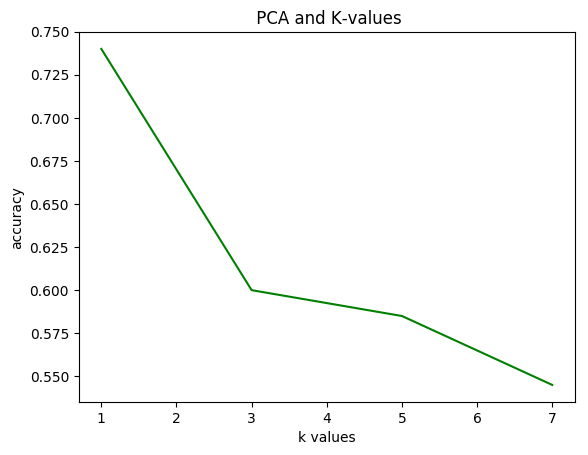

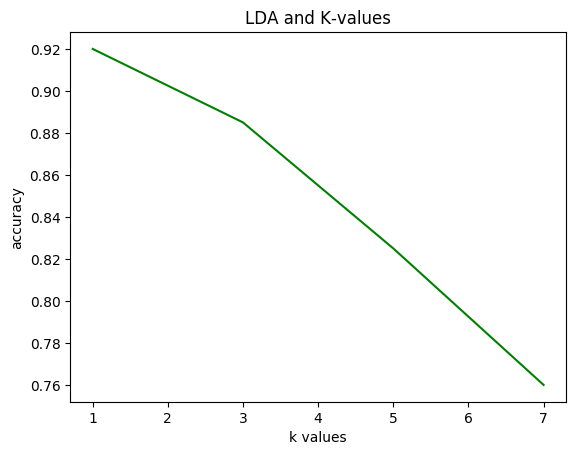

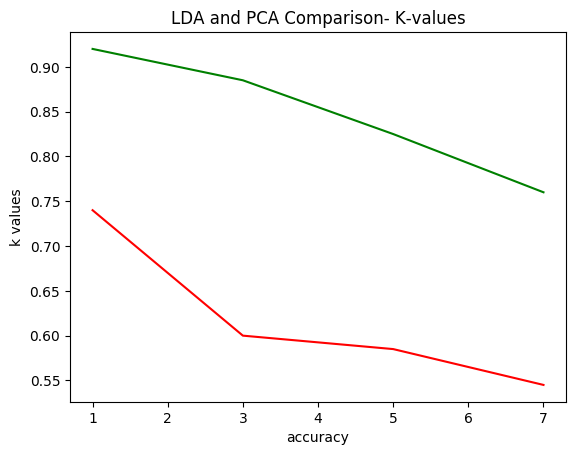

In [0]:
def bar_chart_comparison(first_name="zeyad",second_name="khaled",xLabel="person",yLabel="Scores"
                      ,title="Scores by Person",first_values=[10, 55, 40, 65],second_values=[15,16,17,18],comparison_titles=["A","B","C","D"] ):
    import matplotlib.pyplot as plt; plt.rcdefaults()


    if len(first_values)!=len(second_values):
        print("first values and second values must be in the same length")
        return
    no_of_groups=len(first_values)
    fig, ax = plt.subplots()
    index = np.arange(no_of_groups)
    bar_width = 0.35
    opacity = 0.8

    plt.bar(index, first_values, bar_width,
                     alpha=opacity,
                     color='b',
                     label=first_name)

    plt.bar(index + bar_width, second_values, bar_width,
                     alpha=opacity,
                     color='g',
                     label=second_name)

    plt.xlabel(xLabel)
    plt.ylabel(yLabel)
    plt.title(title)
    plt.xticks(index + bar_width, comparison_titles)
    plt.legend()

    plt.tight_layout()
    plt.show()
def plot_Line(x=[2,4,5],y=[1,3,5],xlabel="xlabel",ylabel="ylabel",title="title"):
    import matplotlib.pyplot as plt
    plt.plot(x, y ,c='g')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()
def plot_Line2(x=[2,4,5],y=[1,3,5],y2=[1,2,3],xlabel="xlabel",ylabel="ylabel",title="title"):
    import matplotlib.pyplot as plt
    plt.plot(x, y ,c='g')
    plt.plot(x, y2 ,c='r')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

plot_Line(k,accuracy_set_PCA,"k values","accuracy",title=" PCA and K-values")
plot_Line(k,accuracy_set_LDA,"k values","accuracy",title="LDA and K-values")
plot_Line2(k,accuracy_set_LDA,accuracy_set_PCA,"accuracy","k values",title="LDA and PCA Comparison- K-values")



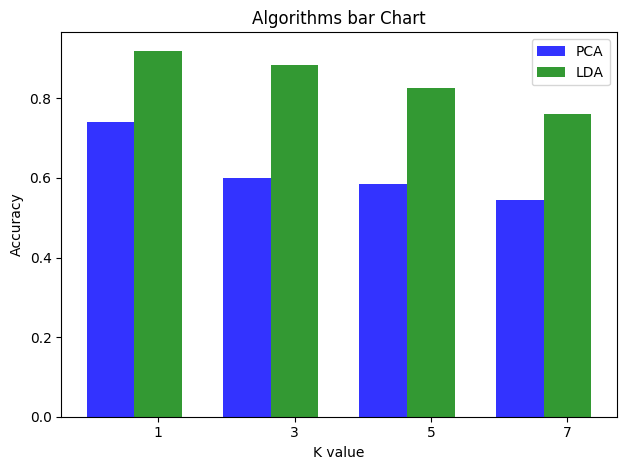

In [0]:
bar_chart_comparison(first_name="PCA",second_name="LDA",xLabel="K value",yLabel="Accuracy",title="Algorithms bar Chart",first_values=accuracy_set_PCA,second_values=accuracy_set_LDA,comparison_titles=["1","3","5","7"] )


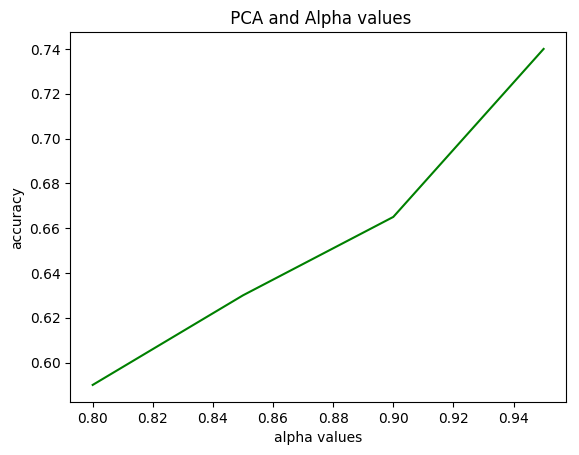

In [0]:

plot_Line(alpha,accuracy_alpha,"alpha values","accuracy",title=" PCA and Alpha values")


In [0]:
def split_the_dataset_for_bonus(dataset,labels):
    train_set = np.zeros(shape=(280,10304),dtype="uint8")
    test_set = np.zeros(shape=(120,10304),dtype="uint8")
    train_labels = np.zeros(shape=(280),dtype="uint8")
    test_labels = np.zeros(shape=(120),dtype="uint8")
    train_set_index = 0
    test_set_index = 0
    goToTrain = True
    trainLimit = 0
    testLimit = 0

    for i in range(0, 400):
        if goToTrain == True:
            trainLimit += 1
            train_set[train_set_index] = dataset[i]
            train_labels[train_set_index] = labels[i]
            train_set_index += 1

        else:
            # print("in Test with i = ", i)
            testLimit += 1
            test_set[test_set_index] = dataset[i]
            test_labels[test_set_index] = labels[i]
            test_set_index += 1

        if ( goToTrain == True and trainLimit == 7 ):
            goToTrain = False
            testLimit = 0
        if ( goToTrain == False and testLimit == 3):
            trainLimit = 0
            goToTrain = True


    return train_set, test_set, train_labels, test_labels
train_set_bonus, test_set_bonus, train_labels_bonus, test_labels_bonus=split_the_dataset_for_bonus(dataset=dataset,labels=labels)
print("done")


done


In [0]:
alpha_bonus,accuracy_alpha_bonus=Tunning_classifier_PCA_Alpha(train_set_bonus, test_set_bonus, train_labels_bonus, test_labels_bonus)
print(alpha)
print(accuracy_alpha)


Tunning classifier PCA ALPHA
for alpha =  0.8
[85.41071429 85.33928571 85.65357143 ... 74.75714286 74.16785714
 73.35714286]
(280, 10304)
covariance matrix
(10304, 10304)
[[1267.49917092 1256.57493622 1253.02442602 ... -140.0002551
  -106.5653699   -31.9002551 ]
 [1256.57493622 1263.58131378 1254.41753827 ... -128.58903061
   -97.08909439  -26.49260204]
 [1253.02442602 1254.41753827 1261.3621301  ... -141.4519898
  -106.9311352   -40.87270408]
 ...
 [-140.0002551  -128.58903061 -141.4519898  ... 2116.91959184
  1902.00505102 1721.19744898]
 [-106.5653699   -97.08909439 -106.9311352  ... 1902.00505102
  1949.46825255 1776.56862245]
 [ -31.9002551   -26.49260204  -40.87270408 ... 1721.19744898
  1776.56862245 1838.76530612]]
working on eigenvactors
[ 2.92654670e+06  2.03423818e+06  1.13179252e+06 ... -1.00713497e-09
 -1.84226706e-09 -2.16239618e-09]
16076731.793673456
z shape(280, 10304)
new eigen vectors (10304, 39)
(280, 39)
(120, 39)
[[-28.9849572   -3.88181746 -12.77188471 ...   8.36

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


covariance matrix
(10304, 10304)
[[1267.49917092 1256.57493622 1253.02442602 ... -140.0002551
  -106.5653699   -31.9002551 ]
 [1256.57493622 1263.58131378 1254.41753827 ... -128.58903061
   -97.08909439  -26.49260204]
 [1253.02442602 1254.41753827 1261.3621301  ... -141.4519898
  -106.9311352   -40.87270408]
 ...
 [-140.0002551  -128.58903061 -141.4519898  ... 2116.91959184
  1902.00505102 1721.19744898]
 [-106.5653699   -97.08909439 -106.9311352  ... 1902.00505102
  1949.46825255 1776.56862245]
 [ -31.9002551   -26.49260204  -40.87270408 ... 1721.19744898
  1776.56862245 1838.76530612]]
working on eigenvactors
[ 2.92654670e+06  2.03423818e+06  1.13179252e+06 ... -1.00713497e-09
 -1.84226706e-09 -2.16239618e-09]
16076731.793673456
z shape(280, 10304)
new eigen vectors (10304, 57)
(280, 57)
(120, 57)
[[-28.9849572   -3.88181746 -12.77188471 ...  22.47378218  11.78848291
   19.41649784]
 [  2.97646572 -26.6319068  -23.05685413 ...  20.95829665  20.38094692
    5.14918979]
 [-19.43514201 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


covariance matrix
(10304, 10304)
[[1267.49917092 1256.57493622 1253.02442602 ... -140.0002551
  -106.5653699   -31.9002551 ]
 [1256.57493622 1263.58131378 1254.41753827 ... -128.58903061
   -97.08909439  -26.49260204]
 [1253.02442602 1254.41753827 1261.3621301  ... -141.4519898
  -106.9311352   -40.87270408]
 ...
 [-140.0002551  -128.58903061 -141.4519898  ... 2116.91959184
  1902.00505102 1721.19744898]
 [-106.5653699   -97.08909439 -106.9311352  ... 1902.00505102
  1949.46825255 1776.56862245]
 [ -31.9002551   -26.49260204  -40.87270408 ... 1721.19744898
  1776.56862245 1838.76530612]]
working on eigenvactors
[ 2.92654670e+06  2.03423818e+06  1.13179252e+06 ... -1.00713497e-09
 -1.84226706e-09 -2.16239618e-09]
16076731.793673456
z shape(280, 10304)
new eigen vectors (10304, 89)
(280, 89)
(120, 89)
[[-28.9849572   -3.88181746 -12.77188471 ...  19.18928822   2.90506021
   19.08684005]
 [  2.97646572 -26.6319068  -23.05685413 ...  27.38712457   0.61779199
   34.49022971]
 [-19.43514201 

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


covariance matrix
(10304, 10304)
[[1267.49917092 1256.57493622 1253.02442602 ... -140.0002551
  -106.5653699   -31.9002551 ]
 [1256.57493622 1263.58131378 1254.41753827 ... -128.58903061
   -97.08909439  -26.49260204]
 [1253.02442602 1254.41753827 1261.3621301  ... -141.4519898
  -106.9311352   -40.87270408]
 ...
 [-140.0002551  -128.58903061 -141.4519898  ... 2116.91959184
  1902.00505102 1721.19744898]
 [-106.5653699   -97.08909439 -106.9311352  ... 1902.00505102
  1949.46825255 1776.56862245]
 [ -31.9002551   -26.49260204  -40.87270408 ... 1721.19744898
  1776.56862245 1838.76530612]]
working on eigenvactors
[ 2.92654670e+06  2.03423818e+06  1.13179252e+06 ... -1.00713497e-09
 -1.84226706e-09 -2.16239618e-09]
16076731.793673456
z shape(280, 10304)
new eigen vectors (10304, 145)
(280, 145)
(120, 145)
[[-28.9849572   -3.88181746 -12.77188471 ...  16.98474253  -2.55526145
  -44.16126873]
 [  2.97646572 -26.6319068  -23.05685413 ...   7.78409539 -28.60358727
  -22.8896085 ]
 [-19.435142

In [0]:
k_bonus,accuracy_set_PCA_bonus,accuracy_set_LDA_bonus=Tunning_classifier_k(train_set_bonus, test_set_bonus, train_labels_bonus, test_labels_bonus)
print(k_bonus)
print(accuracy_set_PCA_bonus)
print(accuracy_set_LDA_bonus)


[85.41071429 85.33928571 85.65357143 ... 74.75714286 74.16785714
 73.35714286]
(280, 10304)
covariance matrix
(10304, 10304)
[[1267.49917092 1256.57493622 1253.02442602 ... -140.0002551
  -106.5653699   -31.9002551 ]
 [1256.57493622 1263.58131378 1254.41753827 ... -128.58903061
   -97.08909439  -26.49260204]
 [1253.02442602 1254.41753827 1261.3621301  ... -141.4519898
  -106.9311352   -40.87270408]
 ...
 [-140.0002551  -128.58903061 -141.4519898  ... 2116.91959184
  1902.00505102 1721.19744898]
 [-106.5653699   -97.08909439 -106.9311352  ... 1902.00505102
  1949.46825255 1776.56862245]
 [ -31.9002551   -26.49260204  -40.87270408 ... 1721.19744898
  1776.56862245 1838.76530612]]
working on eigenvactors
[ 2.92654670e+06  2.03423818e+06  1.13179252e+06 ... -1.00713497e-09
 -1.84226706e-09 -2.16239618e-09]
16076731.793673456
z shape(280, 10304)
new eigen vectors (10304, 145)
Done PCA
Mean Vector class 1: [51.14285714 54.14285714 51.85714286 ... 53.85714286 49.
 54.14285714] (1, 10304)

Mea

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


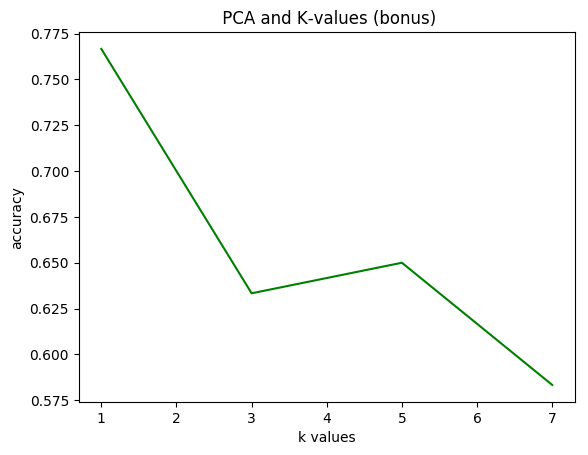

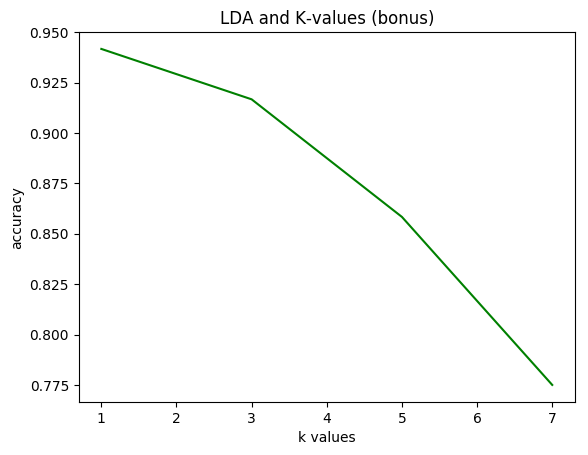

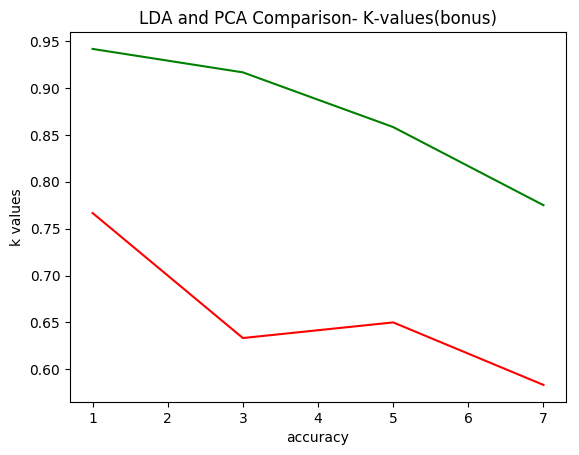

In [0]:
plot_Line(k,accuracy_set_PCA_bonus,"k values","accuracy",title=" PCA and K-values (bonus)")
plot_Line(k,accuracy_set_LDA_bonus,"k values","accuracy",title="LDA and K-values (bonus)")
plot_Line2(k,accuracy_set_LDA_bonus,accuracy_set_PCA_bonus,"accuracy","k values",title="LDA and PCA Comparison- K-values(bonus)")


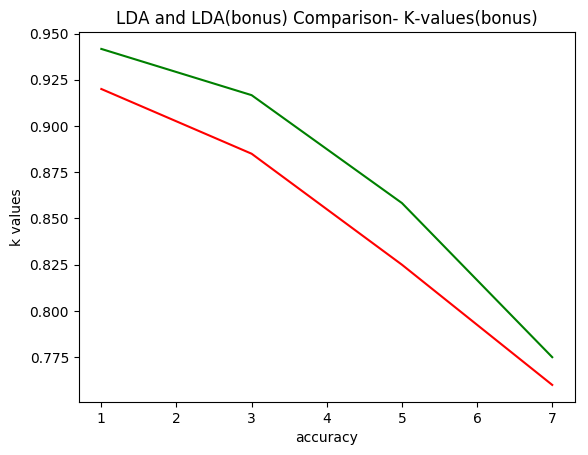

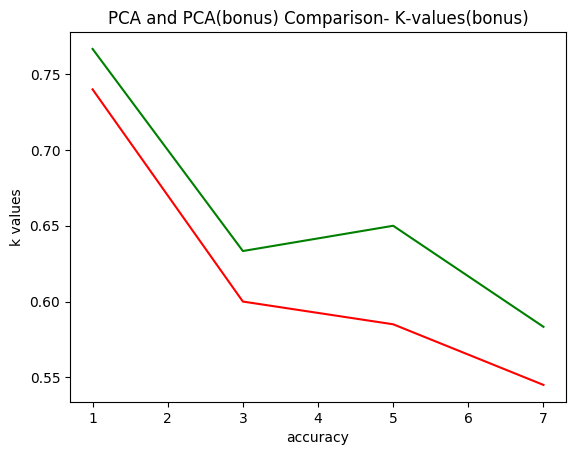

In [0]:
plot_Line2(k,accuracy_set_LDA_bonus,accuracy_set_LDA,"accuracy","k values",title="LDA and LDA(bonus) Comparison- K-values(bonus)")
plot_Line2(k,accuracy_set_PCA_bonus,accuracy_set_PCA,"accuracy","k values",title="PCA and PCA(bonus) Comparison- K-values(bonus)")



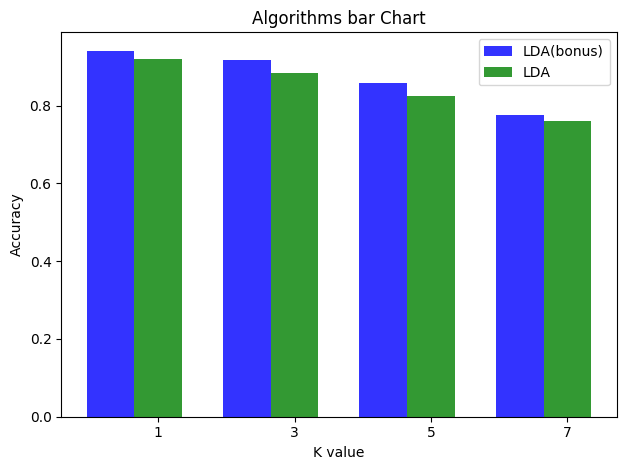

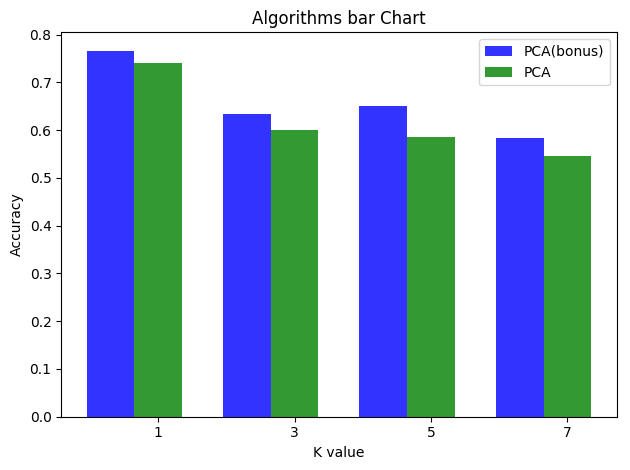

In [0]:
bar_chart_comparison(first_name="LDA(bonus)",second_name="LDA",xLabel="K value",yLabel="Accuracy",title="Algorithms bar Chart",first_values=accuracy_set_LDA_bonus,second_values=accuracy_set_LDA,comparison_titles=["1","3","5","7"] )
bar_chart_comparison(first_name="PCA(bonus)",second_name="PCA",xLabel="K value",yLabel="Accuracy",title="Algorithms bar Chart",first_values=accuracy_set_PCA_bonus,second_values=accuracy_set_PCA,comparison_titles=["1","3","5","7"] )


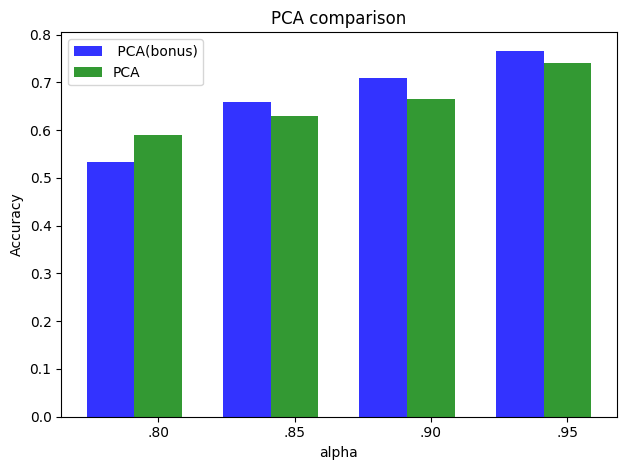

In [0]:
bar_chart_comparison(first_name=" PCA(bonus)",second_name="PCA",xLabel="alpha",yLabel="Accuracy",title="PCA comparison", first_values=accuracy_alpha_bonus , second_values=accuracy_alpha , comparison_titles=[".80",".85",".90",".95"] )


In [0]:
def read_dataset2(datset_dir_name="dataset"):
    inner_dir="s"
    # image_file="1"
    index=0
    dataset=np.zeros(shape=(100,10304),dtype="uint8")
    labels=np.zeros(shape=100)
    # print(dataset.shape)
    for image_name in range(1,100):
        img = cv2.imread("/content/gdrive/My Drive/rand_imgs_pgm.zip (Unzipped Files)/"  + str(image_name) + "_result.pgm", 0)
        img=np.reshape(img,newshape=(92*112))
        dataset[index]=img
        labels[index]=2
        index=index+1
    return dataset,labels

dataset2,labels2=read_dataset2()

In [0]:
def split_data_set_bonus(dataset1,dataset2):
    train_set=np.zeros(shape=(200,10340))
    train_labels=np.zeros(200)
    test_set=np.zeros(shape=(10,10340))
    test_labels=np.zeros((20))
    train_set=np.vstack((dataset1[0:90],dataset2[0:90],dataset1[90:110]))

    train_labels[0:90]=1
    train_labels[90:180]=2
    train_labels[180:200]=1
    test_set=np.vstack((dataset1[110:120],dataset2[90:100]))
    test_labels[0:10]=1
    test_labels[10:20]=2




    return train_set,train_labels,test_set,test_labels


In [0]:
train_set3,train_labels3,test_set3,test_labels3=split_data_set_bonus(dataset,dataset2)
print(test_set3.shape)
print(test_labels3.shape)

(20, 10304)
(20,)


In [0]:
def LDA2(x, y, x2,number_of_labels):
    # x is the data , y is labels
    # 1 Calculating the mean vector for each class of the 40 classes
    mean_vectors = []
    for cl in range(1, number_of_labels+1):
        mean_vectors.append(np.mean(x[y == cl], axis=0))
        print('Mean Vector class %s: %s %s\n' % (cl, mean_vectors[cl - 1], np.shape(mean_vectors)))

    # 2 Between-class scatter matrix SB
    Sb = np.zeros((10304, 10304))
    overall_mean = np.mean(x, axis=0)
    print("Overall Mean", overall_mean, np.shape(overall_mean))
    # mean_vec shape > 1*10304   & mean_vectors > 400*10304
    for m, mean_vec in enumerate(mean_vectors):
        # m is the class number( label ) starts from 0 so we use m+1 to match labels
        n = x[y == m + 1, :].shape[0]  # number of samples in k-th class
        #print("N: ", n)
        #print(n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T))
        mean_vec = mean_vec.reshape(10304, 1)  # make column vector
        overall_mean = overall_mean.reshape(10304, 1)  # make column vector
        Sb += n * (mean_vec - overall_mean).dot((mean_vec - overall_mean).T)
        #print("Sb: ", Sb)
        # np.matrix(Sb)
    print('between-class SHAPE:\n', np.shape(Sb))


    S = np.zeros((10304, 10304))
    for cl, mv in zip(range(1, number_of_labels), mean_vectors):
        Si = np.zeros((10304, 10304))   # scatter matrix for every class
        for row in x[y == cl]:
            # row, mv = row.reshape(10304, 1), mv.reshape(10304, 1)  # make column vectors
            row, mv = row.reshape(10304, 1), mv.reshape(10304, 1)
            Zi = row - mv
            Si += Zi.dot(Zi.T)
        S += Si  # sum class scatter matrices


    # 4 eigens
    s_inverse = np.linalg.inv(S)
    print("Done with inverse(S),Working on eigens...")
    eig_vals, eig_vecs = np.linalg.eigh(s_inverse.dot(Sb))

    # Sorting the eigen values & vector in descending order
    # Make a list of (eigenvalue, eigenvector) tuples
    print("Sorting eigens...")
    eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]

    # Sort the (eigenvalue, eigenvector) tuples from high to low
    eig_pairs = sorted(eig_pairs, key=lambda k: k[0], reverse=True)


    print("Projecting the data...")
    numofVectors = 39
    dominantEigenVectors=[0]*numofVectors
    for i in range(0, numofVectors):
        dominantEigenVectors[i] = (eig_pairs[i][1])
        print("Dominant EigenVector: ", dominantEigenVectors[i])
        print("SHAPE OF EigenVector: ", np.shape(dominantEigenVectors[i]))
    print("Shape of U: ", np.shape(dominantEigenVectors))

    newTrainingData = np.matrix(x).dot(np.transpose(dominantEigenVectors))
    newTestData = np.matrix(x2).dot(np.transpose(dominantEigenVectors))

    return newTrainingData, newTestData


In [0]:
reducedTrainingData3, reducedTestData3= PCA(train_set3, .95,test_set3)
print(np.shape(reducedTrainingData3))
    #print(reducedTrainingData)

print(np.shape(reducedTestData3))
print(reducedTestData3)
print("Done PCA")


[118.38  118.36  118.785 ...  76.615  75.74   76.405]
(200, 10304)
covariance matrix
(10304, 10304)
[[4023.1656   4047.5282   4022.4717   ... 1233.1063   1236.9038
  1223.9311  ]
 [4047.5282   4138.1704   4081.9574   ... 1288.0436   1288.2786
  1270.8292  ]
 [4022.4717   4081.9574   4093.918775 ... 1255.567225 1259.9341
  1245.502075]
 ...
 [1233.1063   1288.0436   1255.567225 ... 2833.786775 2797.0899
  2723.875925]
 [1236.9038   1288.2786   1259.9341   ... 2797.0899   2846.3624
  2783.9503  ]
 [1223.9311   1270.8292   1245.502075 ... 2723.875925 2783.9503
  2805.190975]]
working on eigenvactors
[ 1.19730251e+07  4.34420970e+06  2.63047773e+06 ... -3.44189641e-09
 -4.25278051e-09 -5.34529443e-09]
35441982.03107496
z shape(200, 10304)
new eigen vectors (10304, 84)
(200, 84)
(20, 84)
[[-14.38957323  15.57905694  17.20764947 ...  17.8922533   13.09393936
  -27.9701267 ]
 [ -8.68046894  56.87488944 -11.1559747  ...  34.06917422 -11.49135794
   20.62932626]
 [ -8.81316442   1.25376425 -17.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

      #Classification using KNN
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(reducedTrainingData3, train_labels3)

y_pred = classifier.predict(reducedTestData3)
print(y_pred)
print(test_labels3)
print("Shapre of Pred: ", np.shape(y_pred))
from sklearn.metrics import accuracy_score
score=accuracy_score(test_labels3, y_pred)
print("Accuracy: ",score )


[1. 2. 2. 1. 2. 2. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Shapre of Pred:  (20,)
Accuracy:  0.7


In [0]:
reducd_train3,reduced_test3=LDA2(train_set3,train_labels3 , test_set3,2)

Mean Vector class 1: [95.77272727 95.72727273 95.74545455 ... 62.74545455 62.52727273
 63.96363636] (1, 10304)

Mean Vector class 2: [146.01111111 146.02222222 146.94444444 ...  93.56666667  91.88888889
  91.61111111] (2, 10304)

Overall Mean [118.38  118.36  118.785 ...  76.615  75.74   76.405] (10304,)
between-class SHAPE:
 (10304, 10304)
Done with inverse(S),Working on eigens...
Sorting eigens...
Projecting the data...
Dominant EigenVector:  [-0.00969048 -0.0097017  -0.00988421 ...  0.00546887 -0.00824749
 -0.00061133]
SHAPE OF EigenVector:  (10304,)
Dominant EigenVector:  [ 0.00975392  0.0097646   0.0099319  ...  0.0055132  -0.0083107
 -0.00061601]
SHAPE OF EigenVector:  (10304,)
Dominant EigenVector:  [-0.00603602 -0.00604196 -0.00612757 ...  0.00717048 -0.01080055
 -0.00080055]
SHAPE OF EigenVector:  (10304,)
Dominant EigenVector:  [ 0.00578047  0.0057878   0.00591395 ...  0.00707679 -0.0106807
 -0.0007917 ]
SHAPE OF EigenVector:  (10304,)
Dominant EigenVector:  [ 0.00731032  0.0

In [0]:
from sklearn.neighbors import KNeighborsClassifier

      #Classification using KNN
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(reducd_train3, train_labels3)

y_pred = classifier.predict(reduced_test3)
print(y_pred)
print(test_labels3)
print("Shapre of Pred: ", np.shape(y_pred))
from sklearn.metrics import accuracy_score
score=accuracy_score(test_labels3, y_pred)
print("Accuracy: ",score )

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]
Shapre of Pred:  (20,)
Accuracy:  0.95
